<a href="https://colab.research.google.com/github/VRAHUL8499/exercise-/blob/main/iris(knn).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##KNN exercise on iris  dataset using Classification 

In [276]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 

In [277]:
iris = pd.read_csv('https://github.com/YBI-Foundation/Dataset/raw/main/IRIS.csv')

In [278]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [279]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [280]:
iris.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [281]:
iris.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

In [282]:
X = iris.drop(['species'],axis = 1)

In [283]:
y = iris['species']

In [284]:
y

0         Iris-setosa
1         Iris-setosa
2         Iris-setosa
3         Iris-setosa
4         Iris-setosa
            ...      
145    Iris-virginica
146    Iris-virginica
147    Iris-virginica
148    Iris-virginica
149    Iris-virginica
Name: species, Length: 150, dtype: object

In [285]:
from sklearn.preprocessing import LabelEncoder

In [286]:
le = LabelEncoder()

In [287]:
y = le.fit_transform(y)

In [288]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [289]:
from sklearn.model_selection import train_test_split

In [290]:
X_train,X_test,y_train,y_test = train_test_split(X,y, train_size = 0.7 , random_state = 2529)

In [291]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((105, 4), (45, 4), (105,), (45,))

In [292]:
X_train

,sepal_length,sepal_width,petal_length,petal_width
84,5.4,3.0,4.5,1.5
13,4.3,3.0,1.1,0.1
64,5.6,2.9,3.6,1.3
39,5.1,3.4,1.5,0.2
79,5.7,2.6,3.5,1.0
...,...,...,...,...
72,6.3,2.5,4.9,1.5
143,6.8,3.2,5.9,2.3
60,5.0,2.0,3.5,1.0
50,7.0,3.2,4.7,1.4


In [293]:
y_train

array([1, 0, 1, 0, 1, 0, 0, 1, 0, 2, 1, 1, 0, 1, 1, 2, 0, 2, 1, 0, 2, 0,
       1, 2, 0, 2, 2, 0, 1, 0, 1, 1, 2, 0, 1, 0, 2, 1, 0, 0, 2, 2, 1, 2,
       0, 1, 0, 0, 0, 2, 0, 1, 1, 2, 2, 1, 1, 2, 1, 2, 2, 2, 2, 1, 0, 1,
       0, 2, 1, 1, 1, 0, 2, 2, 2, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0,
       0, 1, 2, 1, 1, 2, 0, 0, 1, 0, 1, 2, 1, 2, 1, 1, 1])

In [294]:
from sklearn.preprocessing import StandardScaler 

In [295]:
ss = StandardScaler()

In [296]:
X_train = ss.fit_transform(X_train)

In [297]:
X_train

array([[-0.45274402, -0.05379268,  0.53306676,  0.5028967 ],
       [-1.88933563, -0.05379268, -1.49576942, -1.42728124],
       [-0.19154555, -0.27972194, -0.00397811,  0.227157  ],
       [-0.84454173,  0.84992435, -1.25708281, -1.28941139],
       [-0.06094631, -0.95750971, -0.06364976, -0.18645256],
       [-0.7139425 ,  2.43142916, -1.25708281, -1.42728124],
       [-0.84454173,  1.75364139, -1.0183962 , -1.01367168],
       [-0.19154555, -1.18343897,  0.17503685, -0.04858271],
       [-1.23633945,  0.84992435, -1.0183962 , -1.28941139],
       [ 0.72264911, -1.18343897,  0.83142502,  1.05437611],
       [-0.06094631, -0.05379268,  0.3540518 ,  0.08928714],
       [ 0.20025216,  0.39806584,  0.71208172,  0.91650626],
       [-0.84454173,  1.75364139, -1.25708281, -1.15154153],
       [-1.10574021, -1.40936823, -0.18299307, -0.18645256],
       [ 0.59204988, -0.27972194,  0.41372346,  0.227157  ],
       [ 0.85324835,  0.39806584,  1.01043998,  1.60585552],
       [-0.32214479,  2.

In [298]:
from sklearn.neighbors import KNeighborsClassifier

In [299]:
knncla = KNeighborsClassifier(n_neighbors=5)

In [300]:
knncla.fit(X_train,y_train)

KNeighborsClassifier()

In [301]:
y_pred = knncla.predict(X_test)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


In [302]:
y_pred

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2])

In [303]:
from sklearn.metrics import classification_report , confusion_matrix ,accuracy_score, mean_absolute_error

In [304]:
confusion_matrix(y_test,y_pred)

array([[ 0,  0, 14],
       [ 0,  0,  9],
       [ 0,  0, 22]])

In [305]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        14
           1       0.00      0.00      0.00         9
           2       0.49      1.00      0.66        22

    accuracy                           0.49        45
   macro avg       0.16      0.33      0.22        45
weighted avg       0.24      0.49      0.32        45



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [306]:
accuracy_score(y_test,y_pred)

0.4888888888888889

In [307]:
error_rate = []
for i in range(1,40):
  knn = KNeighborsClassifier(n_neighbors=i)
  knn.fit(X_train , y_train)
  pred_i = knn.predict(X_test)
  error_rate.append(accuracy_score(y_test,pred_i))

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names

In [308]:
error_rate

[0.4888888888888889,
 0.4888888888888889,
 0.4888888888888889,
 0.4888888888888889,
 0.4888888888888889,
 0.4888888888888889,
 0.4888888888888889,
 0.4888888888888889,
 0.4888888888888889,
 0.4888888888888889,
 0.4888888888888889,
 0.4888888888888889,
 0.4888888888888889,
 0.4888888888888889,
 0.4888888888888889,
 0.4888888888888889,
 0.4888888888888889,
 0.4888888888888889,
 0.4888888888888889,
 0.4888888888888889,
 0.4888888888888889,
 0.4888888888888889,
 0.4888888888888889,
 0.4888888888888889,
 0.4888888888888889,
 0.4888888888888889,
 0.4888888888888889,
 0.4888888888888889,
 0.4888888888888889,
 0.4888888888888889,
 0.4888888888888889,
 0.4888888888888889,
 0.4888888888888889,
 0.4888888888888889,
 0.4888888888888889,
 0.4888888888888889,
 0.4888888888888889,
 0.4888888888888889,
 0.4888888888888889]

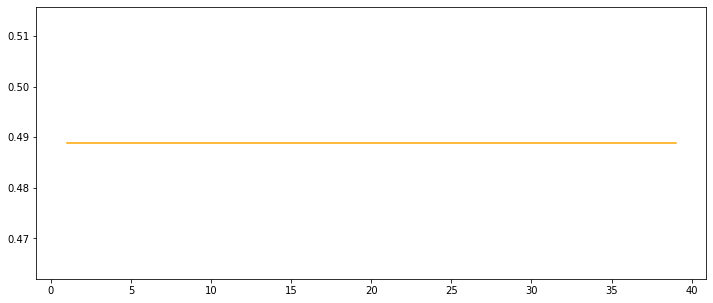

In [309]:
fig, ax = plt.subplots(figsize = (12,5))
ax.plot(range(1,40),error_rate, c= 'Orange')